# 국가별 상품군별 온라인쇼핑 해외직접구매액

# 해외직구 추세 및 구매물품 순위
* 관련기사 : http://news.heraldcorp.com/view.php?ud=20210205000927
* "6일 통계청에 따르면 지난해 온라인 해외 직접 구매액은 4조1094억원으로 전년대비 13.0% 증가했다." 기사 전문에 따르면 2019년도에 비해 2020년도의 직구가 증가했다.
* "상품군별 온라인 해외 직접 구매액은 전년대비 가전·전자·통신기기는 26.1% 감소한 반면 음식료품(22.5%), 의류 및 패션 관련상품(11.%), 생활용품 및 자동차용품(34.%)는 증가했다."


In [121]:
from IPython.display import Image

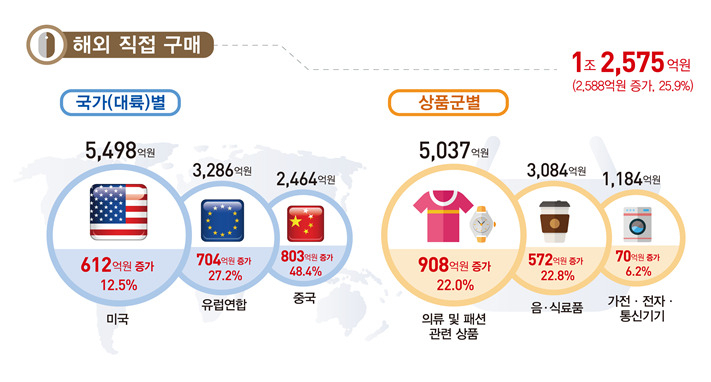

In [122]:
Image("img/2020_4분기_직구현황.jpg")

* 위 이미지에 따르면 국가별에서는 미국이 가장 높고, 상품에서는 의류 및 패션관련 상품이 가장 높은 비율울 차지하고 있다고 보여진다.

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
import os
if os.name == "nt":
    sns.set(font="Malgun Gothic")
else:
    sns.sest(font="AppleGothic")
    
%config InlineBackend.figure_format = 'retina'

In [125]:
df_base = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접구매액_20210314174913.csv", encoding="cp949")
df_base.shape


(150, 22)

In [126]:
df = df_base.melt(id_vars=["국가(대륙)별", "상품군별"], var_name="기간", value_name="백만원")
df.head()

,국가(대륙)별,상품군별,기간,백만원
0,합계,합계,2016 1/4,446312
1,합계,컴퓨터 및 주변기기,2016 1/4,12454
2,합계,가전·전자·통신기기,2016 1/4,37280
3,합계,소프트웨어,2016 1/4,1302
4,합계,서 적,2016 1/4,4057


In [127]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,기간,백만원,연도
0,합계,합계,2016 1/4,446312,2016
1,합계,컴퓨터 및 주변기기,2016 1/4,12454,2016
2,합계,가전·전자·통신기기,2016 1/4,37280,2016
3,합계,소프트웨어,2016 1/4,1302,2016
4,합계,서 적,2016 1/4,4057,2016


In [128]:
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,기간,백만원,연도,분기
0,합계,합계,2016 1/4,446312,2016,1
1,합계,컴퓨터 및 주변기기,2016 1/4,12454,2016,1
2,합계,가전·전자·통신기기,2016 1/4,37280,2016,1
3,합계,소프트웨어,2016 1/4,1302,2016,1
4,합계,서 적,2016 1/4,4057,2016,1


In [142]:
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df.head()

<ipython-input-142-820155e563c8>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)


,국가(대륙)별,상품군별,기간,백만원,연도,분기
16,미국,컴퓨터 및 주변기기,2016 1/4,10180.0,2016,1
17,미국,가전·전자·통신기기,2016 1/4,21478.0,2016,1
18,미국,소프트웨어,2016 1/4,639.0,2016,1
19,미국,서 적,2016 1/4,2655.0,2016,1
20,미국,사무·문구,2016 1/4,1485.0,2016,1


In [130]:
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()

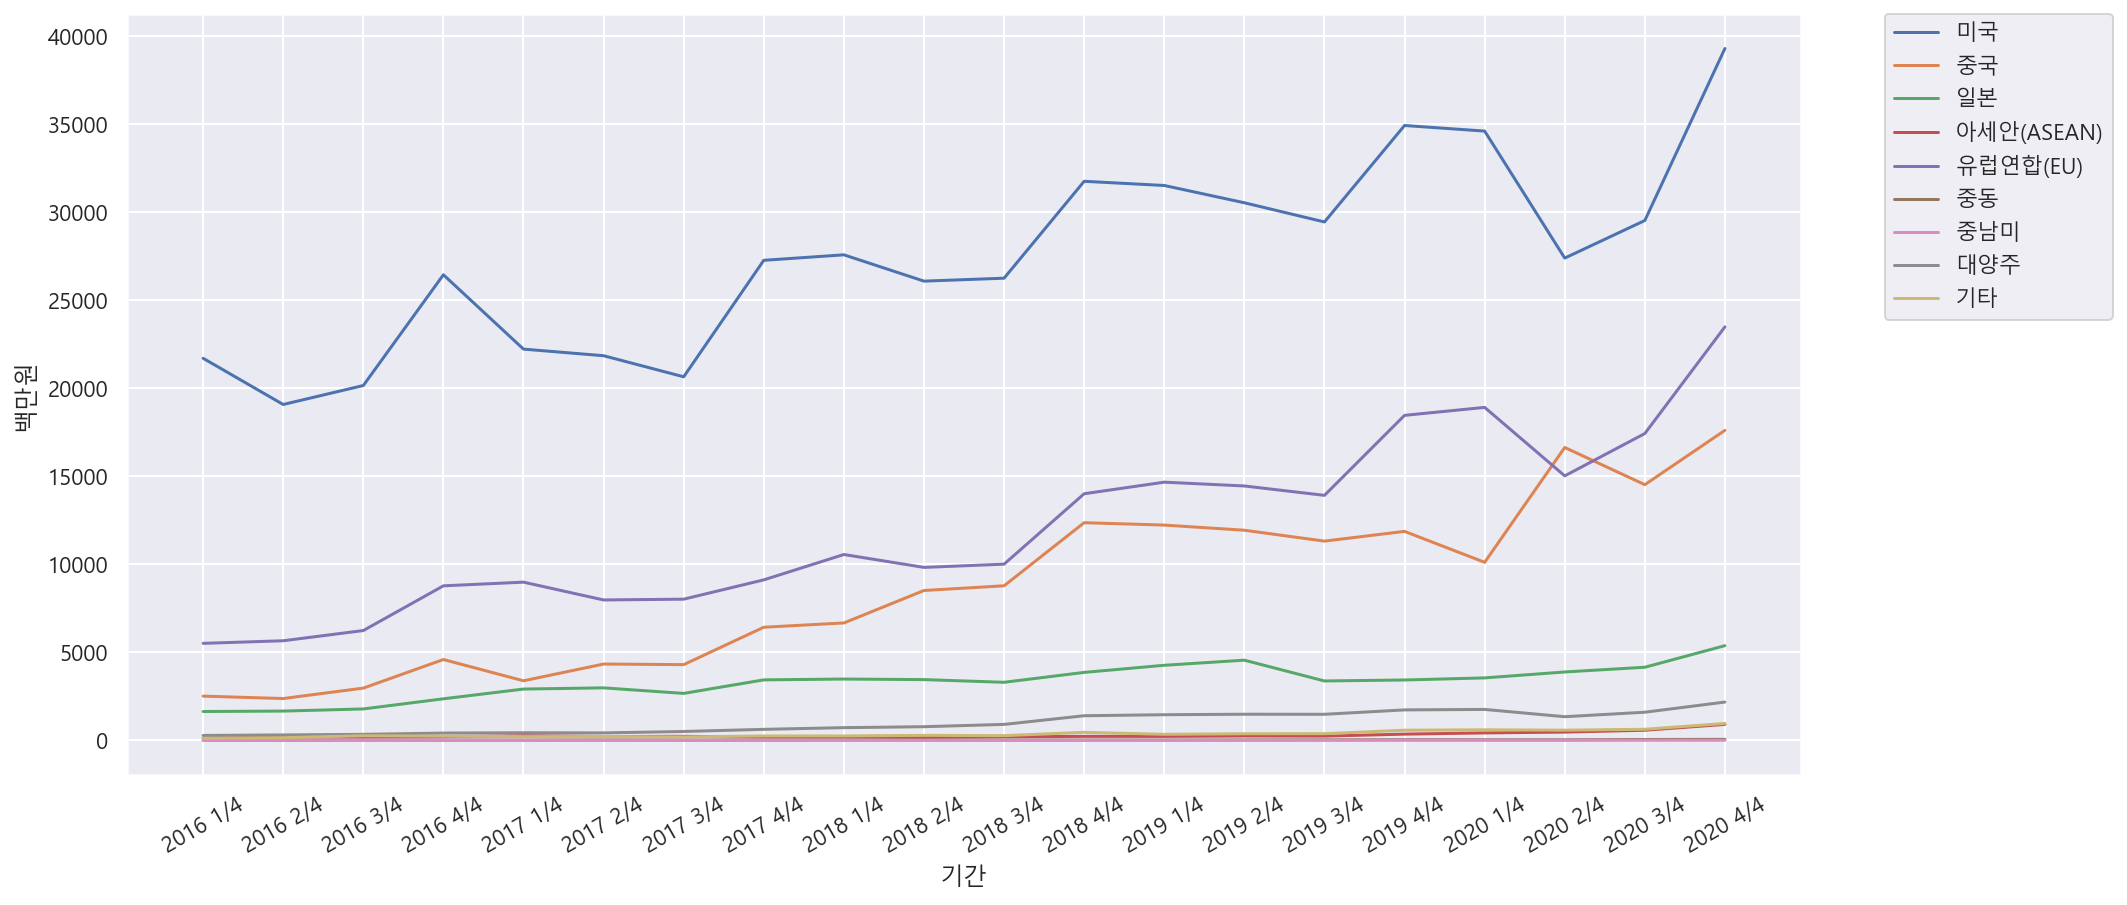

In [131]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=30)
sns.lineplot(data=df, x="기간", y="백만원", hue="국가(대륙)별", ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* 위 그래프를 보면 각 연도의 분기별로 국가별 판매수치를 알 수 있는데, 미국이 가장 높은 수치를 보이고, 유럽, 중국 순으로 그래프가 나타난다

In [132]:
df_set = df[(df["연도"] == 2019) | (df["연도"] == 2020)].copy()
df_set

,국가(대륙)별,상품군별,기간,백만원,연도,분기
1816,미국,컴퓨터 및 주변기기,2019 1/4,9275.0,2019,1
1817,미국,가전·전자·통신기기,2019 1/4,74113.0,2019,1
1818,미국,소프트웨어,2019 1/4,1226.0,2019,1
1819,미국,서 적,2019 1/4,3305.0,2019,1
1820,미국,사무·문구,2019 1/4,1826.0,2019,1
...,...,...,...,...,...,...
2995,기타,아동·유아용품,2020 4/4,53.0,2020,4
2996,기타,음·식료품,2020 4/4,3956.0,2020,4
2997,기타,농축수산물,2020 4/4,7.0,2020,4
2998,기타,생활용품 및 자동차용품,2020 4/4,221.0,2020,4


<AxesSubplot:xlabel='연도', ylabel='백만원'>

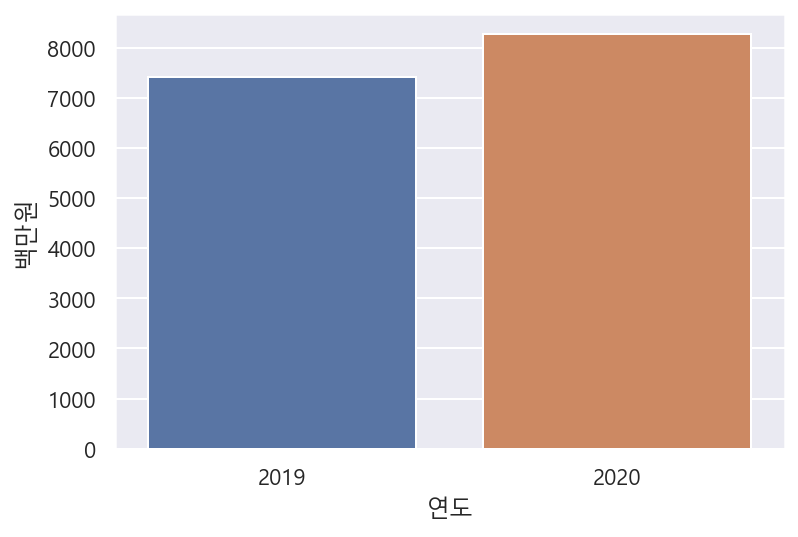

In [135]:
# 2019년도 2020년도 국가(대륙)별 판매금액 비교

sns.barplot(data=df_set, x="연도", y="백만원", ci=None)

* 2019년도에 비해 2020년도에 판매금액이 증가한 것을 알 수 있다.

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


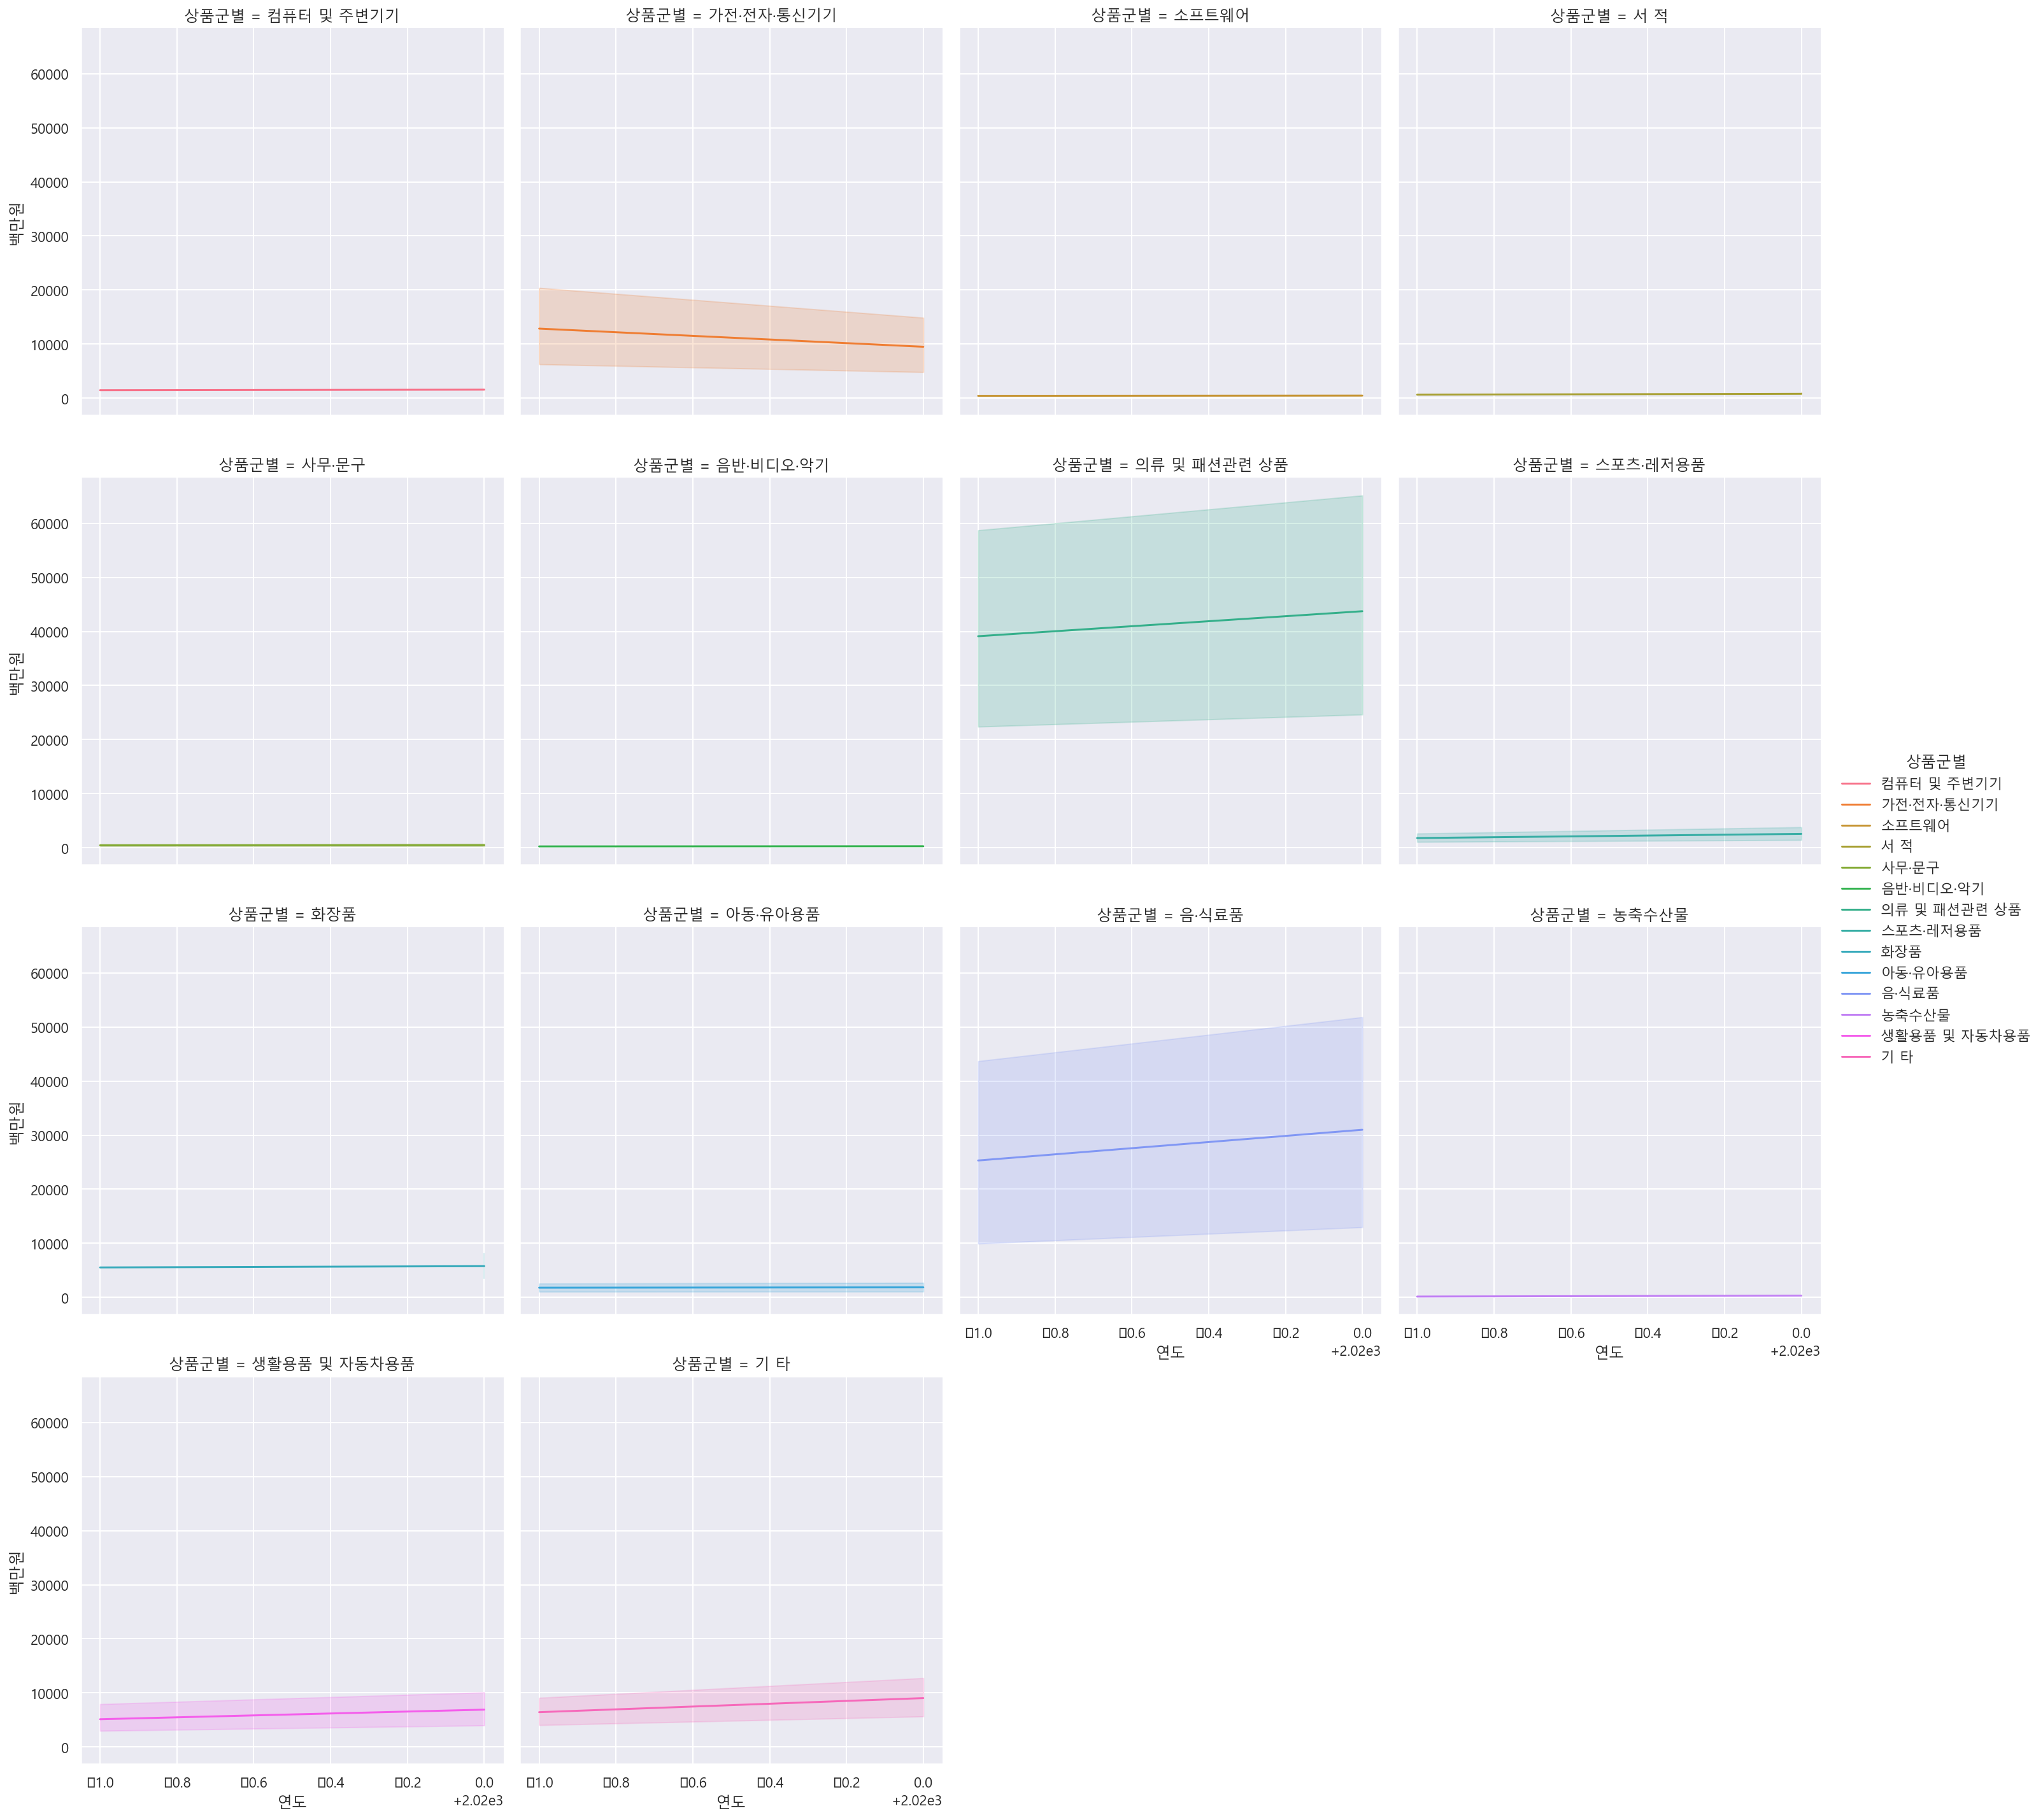

In [136]:
#  2019년도 2020년도 상품군별 판매액 시각화

sns.relplot(data=df_set, x="연도", y="백만원", hue="상품군별", kind="line", 
           col="상품군별", col_wrap=4)

In [137]:
df_set.head()

,국가(대륙)별,상품군별,기간,백만원,연도,분기
1816,미국,컴퓨터 및 주변기기,2019 1/4,9275.0,2019,1
1817,미국,가전·전자·통신기기,2019 1/4,74113.0,2019,1
1818,미국,소프트웨어,2019 1/4,1226.0,2019,1
1819,미국,서 적,2019 1/4,3305.0,2019,1
1820,미국,사무·문구,2019 1/4,1826.0,2019,1


In [138]:
df_set2 = df_set[~df_set["상품군별"].isin(["의류 및 패션관련 상품", "음·식료품", "가전·전자·통신기기"])].copy()

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


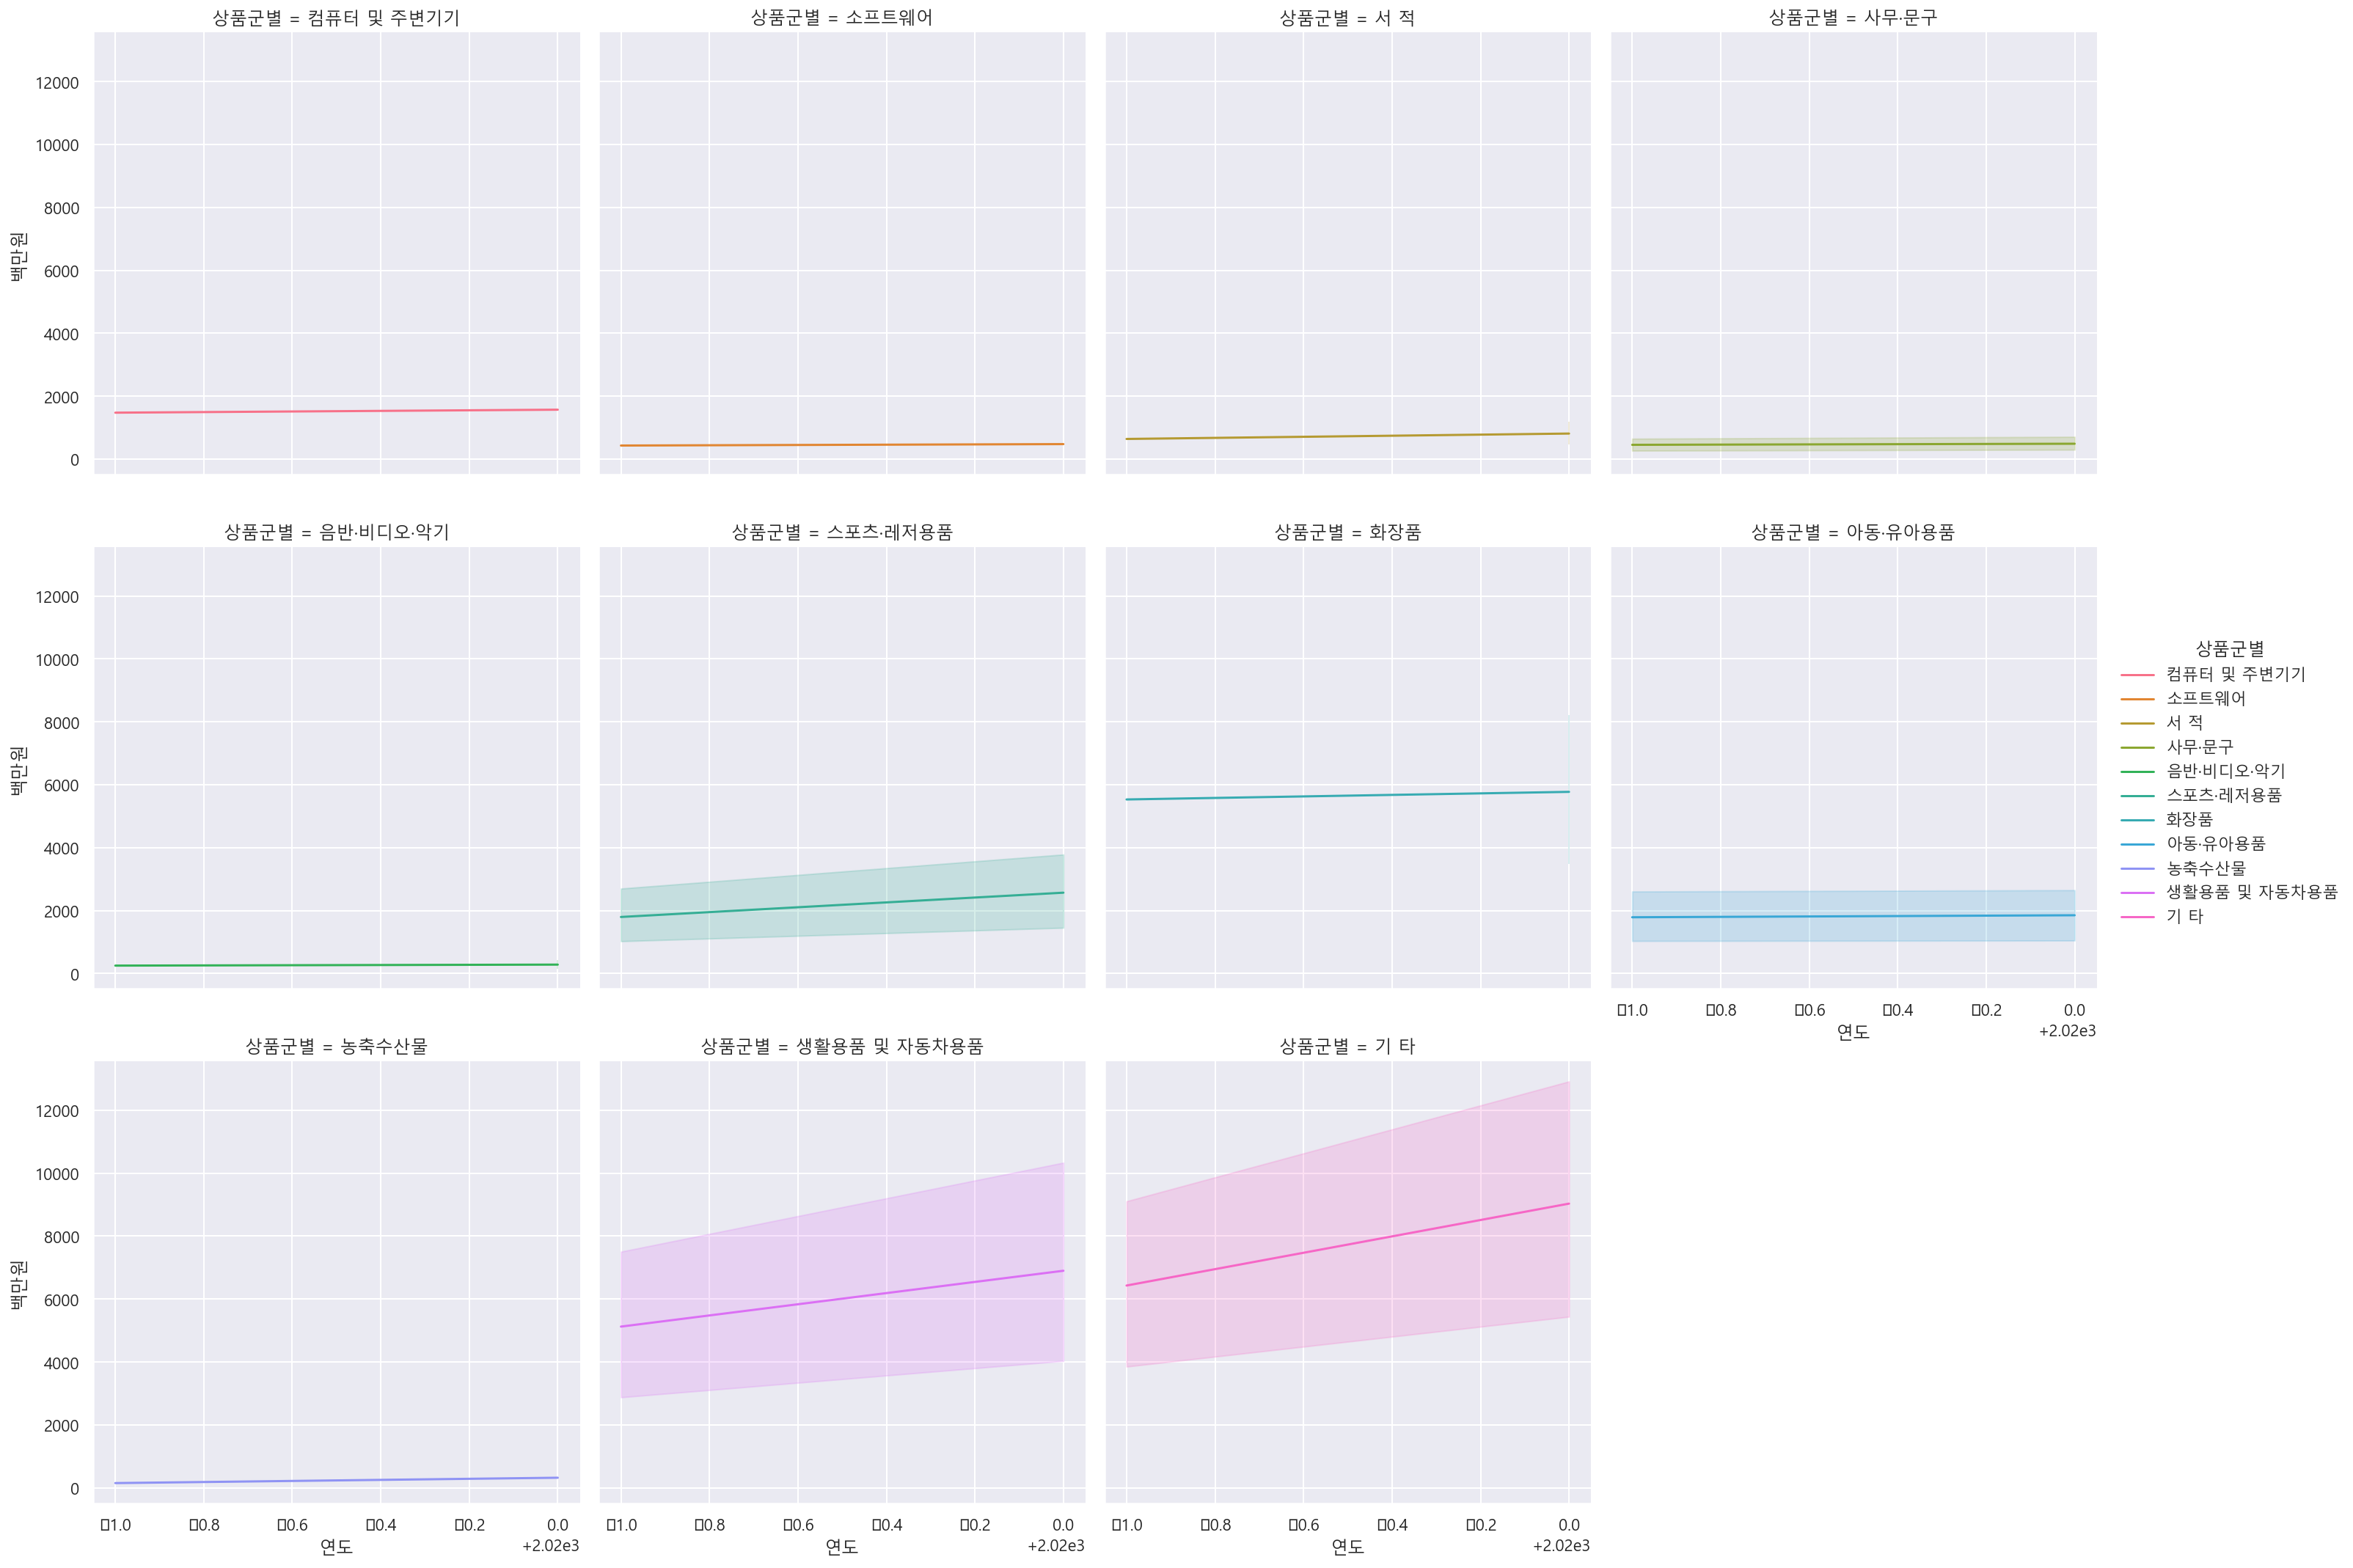

In [139]:
# 수치가 높은 의류 및 패션관련 상품, 음.식료품, 가전·전자·통신기기 제외한 나머지 확인

sns.relplot(data=df_set2, x="연도", y="백만원", hue="상품군별", kind="line", 
           col="상품군별", col_wrap=4)

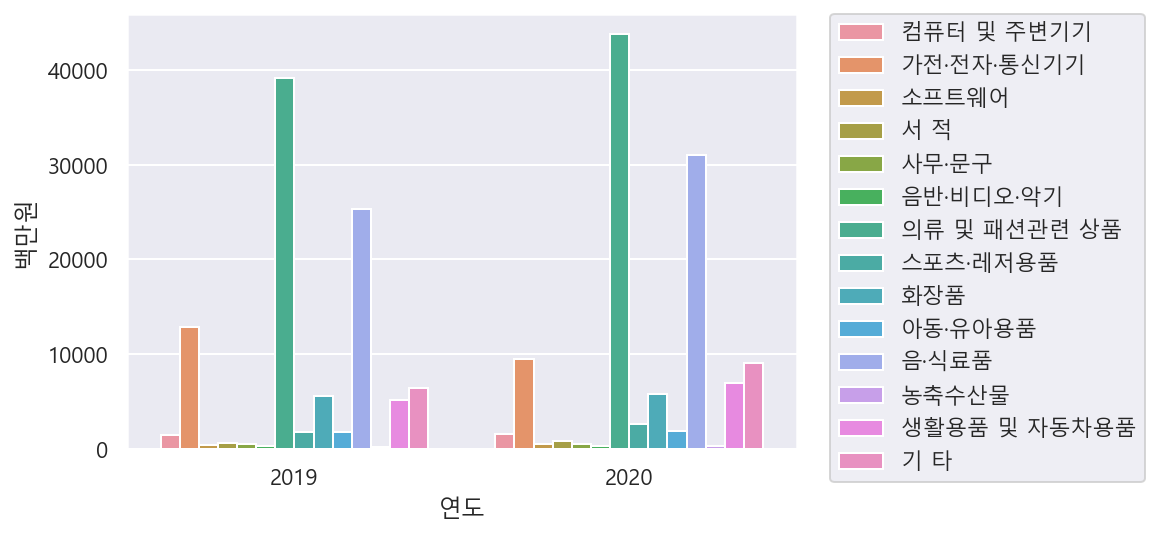

In [143]:
sns.barplot(data=df_set, x="연도", y="백만원", hue="상품군별", ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* 의류 및 패션관련 상품이 판매수치가 가장 높고, 음식료품, 가전·전자·통신기기 순으로 판매수치가 높은 것을 알 수 있다.
* "상품군별 온라인 해외 직접 구매액은 전년대비 가전·전자·통신기기는 26.1% 감소한 반면 음식료품(22.5%), 의류 및 패션 관련상품(11.%), 생활용품 및 자동차용품(34.%)는 증가했다." 기사 전문과 같이 가전·전자·통신기기의 직구는 전년도에 비해 감소한 것을 볼 수 있다.

In [145]:
result = df_set.pivot_table(index="국가(대륙)별", columns="연도", values="백만원")
result

연도,2019,2020
국가(대륙)별,,
기타,418.875000,691.839286
대양주,1537.107143,1717.571429
미국,31582.892857,32683.607143
아세안(ASEAN),267.392857,593.553571
유럽연합(EU),15361.928571,18700.303571
일본,3902.892857,4238.446429
중국,11829.410714,14710.107143
중남미,4.727273,4.760000
중동,26.092593,42.472727


<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

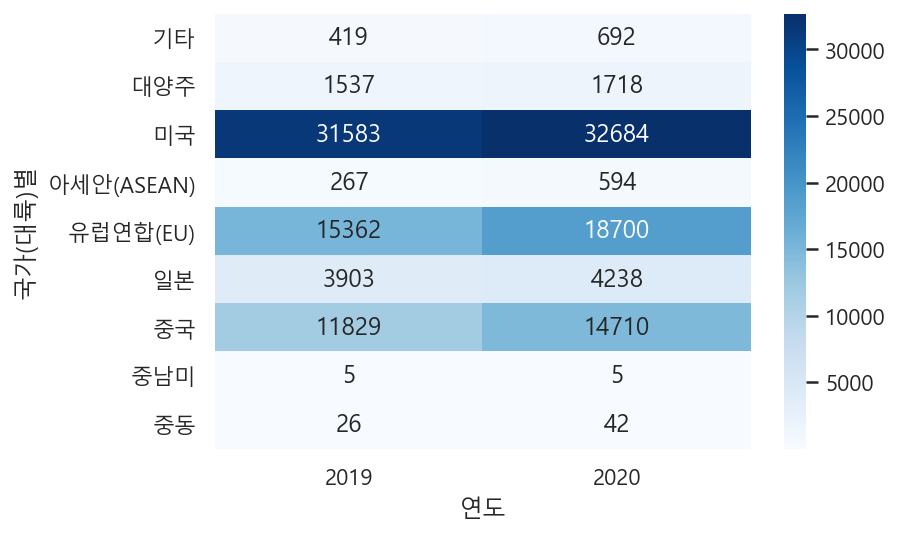

In [147]:
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

In [148]:
result2 = df_set.pivot_table(index="상품군별", columns="연도", values="백만원")
result2

연도,2019,2020
상품군별,,
가전·전자·통신기기,12861.694444,9502.138889
기 타,6429.194444,9033.083333
농축수산물,150.151515,320.342857
사무·문구,452.500000,487.388889
생활용품 및 자동차용품,5123.944444,6899.111111
서 적,639.200000,810.500000
소프트웨어,429.700000,475.375000
스포츠·레저용품,1794.472222,2566.944444
아동·유아용품,1785.500000,1849.333333


<AxesSubplot:xlabel='연도', ylabel='상품군별'>

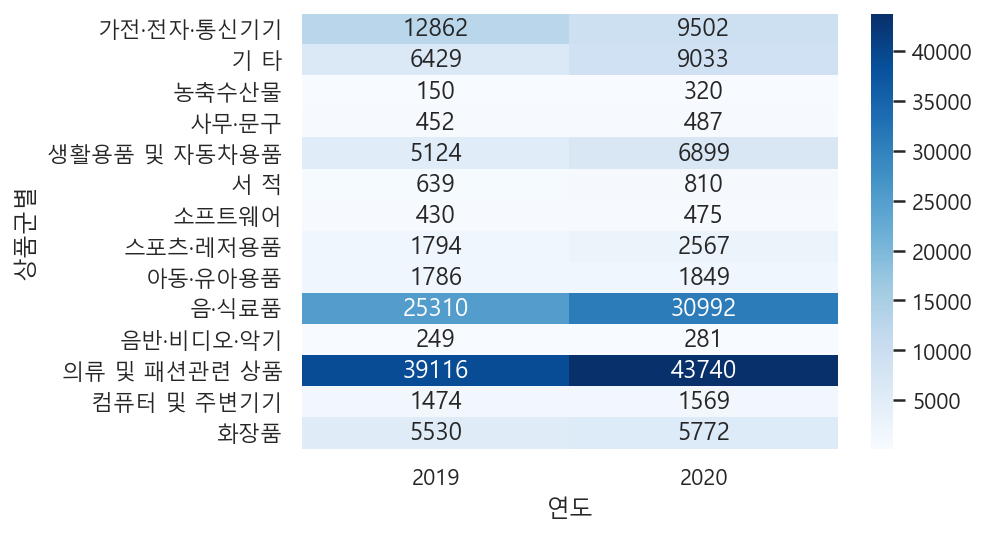

In [149]:
sns.heatmap(result2, cmap="Blues", annot=True, fmt=".0f")